### 캘리포니아 데이터셋 불러오기

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터셋 로드
california = fetch_california_housing()

# 데이터와 타겟을 분리
X = california.data
y = california.target

# 특성 이름 가져오기
feature_names = california.feature_names

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

# 데이터프레임 출력
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### base model

In [2]:
# Medinc, MedHouseVal 하나의 컬럼을 사용해서 base model 을 만들고 모델의 성능을 개선시키는 것!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터를 분할(train, test)
X_train, X_test, y_train, y_test = train_test_split(df[['MedInc']], y ,test_size=0.3, random_state=111)

# 선형회귀 모델 학습
model =LinearRegression()
model.fit(X_train, y_train) #학습데이터로 학습

# 예측
y_pred = model.predict(X_test)

# 평가지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE', mse)
print('R2',r2)

MSE 0.7144345630478385
R2 0.46928988803470373


### 성능개선

#### k = 3

In [3]:
# 피처셀렉션을 통해 kbest로 피처 추가
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func = f_regression, k = 3)
X_new = selector.fit_transform(X,y)

# 선택된 피처 출력
selected_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]
print('Selected_features : ', selected_feature_names)

Selected_features :  ['MedInc', 'AveRooms', 'Latitude']


In [4]:
# 선택된 피처를 넣어서 분석
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 111)

# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형회귀 모델 학습
model_fs = LinearRegression()
model_fs.fit(X_train_scaled, y_train)

# 예측
y_pred_fs = model_fs.predict(X_test_scaled)

# 평가지표 계산
mse_fs = mean_squared_error(y_test, y_pred_fs)
r2_fs = r2_score(y_test, y_pred_fs)

print("MSE:", mse_fs)
print("R2:", r2_fs)

MSE: 0.7083331081344683
R2: 0.4738222888838619


In [5]:
print('MSE', mse)
print('R2',r2)

MSE 0.7144345630478385
R2 0.46928988803470373


=> 피처를 추가하니 성능이 조금 개선되었다..!

#### k = 4

In [6]:
# 피처셀렉션을 통해 kbest로 피처 추가
from sklearn.feature_selection import SelectKBest, f_regression

selector1 = SelectKBest(score_func = f_regression, k = 4)
X_new1 = selector1.fit_transform(X,y)

# 선택된 피처 출력
selected_indices1 = selector1.get_support(indices=True)
selected_feature_names1 = [feature_names[i] for i in selected_indices1]
print('Selected_features : ', selected_feature_names1)

Selected_features :  ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']


In [7]:
# 선택된 피처를 넣어서 분석
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size = 0.3, random_state = 111)

# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형회귀 모델 학습
model_fs1 = LinearRegression()
model_fs1.fit(X_train_scaled, y_train)

# 예측
y_pred_fs1 = model_fs1.predict(X_test_scaled)

# 평가지표 계산
mse_fs1 = mean_squared_error(y_test, y_pred_fs1)
r2_fs1 = r2_score(y_test, y_pred_fs1)

print("MSE:", mse_fs1)
print("R2:", r2_fs1)

MSE: 0.6629365899519312
R2: 0.5075446092944376


In [8]:
print('MSE', mse)
print('R2',r2)

MSE 0.7144345630478385
R2 0.46928988803470373


=> 피처가 추가될수록 성능이 개선된다 그치만 과적합의 가능성을 고려해봐야 한다,,!

#### XGBoost

In [9]:
import xgboost as xgb

# xgb 모델 학습
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = model_xgb.predict(X_test_scaled)

# 평가지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE:", mse_xgb)
print("R2:", r2_xgb)

MSE: 0.4741296742600334
R2: 0.647797817284824


In [10]:
print('MSE', mse)
print('R2',r2)

MSE 0.7144345630478385
R2 0.46928988803470373


=> base 라인과 비교했을 때 MSE는 약 0.24 정도 줄어들고, R2은 0.18 정도 올라가서 성능이 좋아졌다 !

이 성능개선의 이유는 XGBoost 모델이 앙상블 모델이므로 선형회귀모델보다 복잡한 데이터 패턴을 잘 학습할 수 있으며, 캘리포니아 데이터셋이 선형이 아니라 비선형 관계를 가지고 있기 때문이라고 해석할 수 있다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

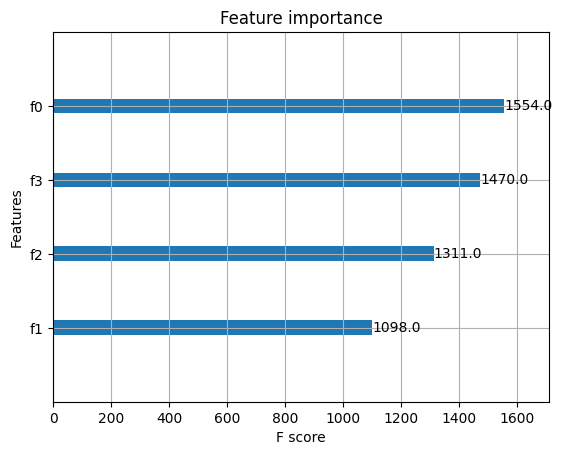

In [11]:
# 변수 중요도
from xgboost import plot_importance
plot_importance(model_xgb)

f0 : 'MedInc'

f3 : 'Latitude'

f2 : 'AveRoooms'

f1 : 'HouseAge'